In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data = pd.read_json('trump_tweets_2009~2018.json')

In [23]:
#分词
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
def tokenizer_tweets(data):
    text = ""
    for i in data.text:
        text += i
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    return tokens
    
tokens = tokenizer_tweets(data)
print(len(tokens))
print(tokens[:10])

690353
['from', 'donald', 'trump', ':', 'wishing', 'everyone', 'a', 'wonderful', 'holiday', '&']


In [26]:
#最多'@'和最多'#'
from nltk import FreqDist

def get_top_10(t):
    return FreqDist([i for i in tokens if i.startswith(t)]).most_common(10)

get_top_10('@')

[('@realdonaldtrump', 8605),
 ('@barackobama', 693),
 ('@foxnews', 474),
 ('@foxandfriends', 441),
 ('@apprenticenbc', 401),
 ('@mittromney', 287),
 ('@cnn', 275),
 ('@ivankatrump', 226),
 ('@megynkelly', 155),
 ('@seanhannity', 152)]

In [27]:
get_top_10('#')

[('#trump2016', 868),
 ('#makeamericagreatagain', 518),
 ('#celebapprentice', 221),
 ('#', 176),
 ('#maga', 155),
 ('#celebrityapprentice', 149),
 ('#trump', 113),
 ('#americafirst', 94),
 ('#draintheswamp', 77),
 ('#trumpforpresident', 76)]

In [19]:
#去停用词和标点符号
from nltk.corpus import stopwords
import string
punctuation = list(string.punctuation)
stop = stopwords.words('english')+punctuation

def tokens_cl(tokens):
    tokens_cl = [i for i in tokens if len(i)>=3 
               and(not i.startswith('@'))
               and(not i.startswith('#'))
               and(not i.startswith('http'))
               and(not i in stop)]
    return tokens_cl

tokens_cl = tokens_cl(tokens)
print(len(tokens_cl))
print(tokens_cl[:10])

279545
['donald', 'trump', 'wishing', 'everyone', 'wonderful', 'holiday', 'happy', 'healthy', 'prosperous', 'new']


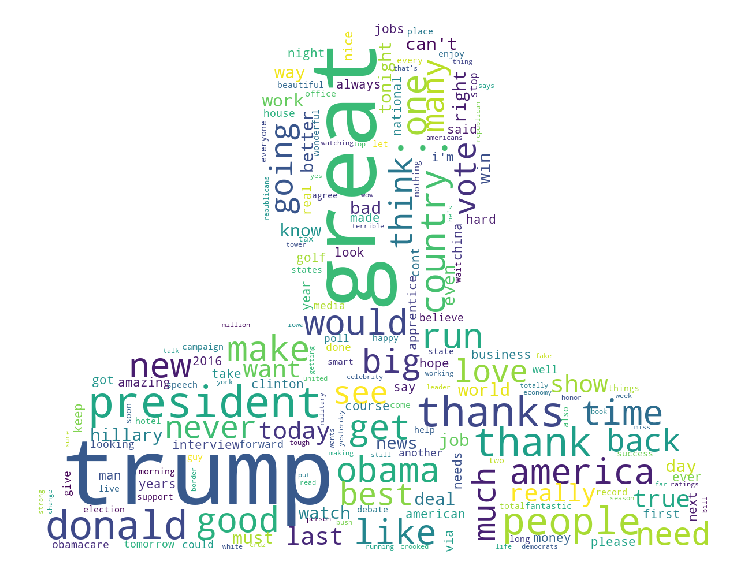

In [54]:
#词云图分析
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
from scipy.misc import imread

bg_pic = imread('img/trump2.jpg')
wc = WordCloud(background_color="white",
                      stopwords=stop,
                      mask=bg_pic,
                      scale=3,
                      max_words=2000,
                      max_font_size=100, 
                      random_state=42
                     ).generate_from_frequencies(FreqDist(tokens_cl))

image_colors = ImageColorGenerator(bg_pic)

plt.figure(figsize=(32,10))
plt.imshow(wc)
plt.axis("off")
plt.show(wc.recolor(color_func=image_colors))